In [4]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt

# Homework

---

## Problem 1

Find the solution to $x = e^{-x}$ accurate to $10^{-6}$ using the bisection method.

Choose an initial bound from the options below and explain why the other is not suitable:
- Bound A: $(-1, 0)$
- Bound B: $(0, 1)$

In [ ]:
Use Bound (0,1) because f(0) and f(1) have opposite signs, ensuring a root inside.Bound A is not suitable since f(-1) and f(0) are both negative.

---
## Problem 2

Find all values of $x$ in $[0, 1]$ such that $f(x) = 0$, where

$$
f(x) = -0.000216747 + 0.0072868x - 0.0977383x^2 + 0.664685x^3 - 2.40773x^4 + 4.46766x^5 - 3.7091x^6 + x^7
$$

Your answers should be accurate to within $10^{-6}$ of the true solution.

In [5]:
def f(x):
    return -0.000216747 + 0.0072868*x - 0.0977383*x**2 + 0.664685*x**3 - \
            2.40773*x**4 + 4.46766*x**5 - 3.7091*x**6 + x**7


2.1) Find all local minima and maxima of the function $f(x)$ defined above. Briefly explain how you determine whether a point is a local maximum or minimum.

In [9]:
import numpy as np
import sympy as sp

x = sp.symbols('x')

f = -0.000216747 + 0.0072868*x - 0.0977383*x**2 + 0.664685*x**3 - \
    2.40773*x**4 + 4.46766*x**5 - 3.7091*x**6 + x**7
f_prime = sp.diff(f, x)

f_double_prime = sp.diff(f_prime, x)

critical_points = sp.solveset(f_prime, x, domain=sp.Interval(0, 1))

classifications = []
for point in critical_points:

    f_double_prime_value = f_double_prime.subs(x, point)

    if f_double_prime_value > 0:
        classification = "Local Minimum"
    elif f_double_prime_value < 0:
        classification = "Local Maximum"
    else:
        classification = "Inconclusive (possible inflection)"

    classifications.append((point, f.subs(x, point), f_double_prime_value, classification))

for point, value, second_derivative, classification in classifications:
    print(f"Critical point at x = {point:.6f}, f(x) = {value:.6f}, f''(x) = {second_derivative:.6f} → {classification}")


Critical point at x = 0.191367, f(x) = 0.000001, f''(x) = -0.002629 → Local Maximum
Critical point at x = 0.297091, f(x) = -0.000012, f''(x) = 0.012575 → Local Minimum
Critical point at x = 0.681781, f(x) = 0.003826, f''(x) = -0.444725 → Local Maximum


We find the critical points where the first derivative f'(x) is equal to 0. This indicates potential maxima, minima, or saddle points. Once we have the critical points, we compute the second derivative f''(x) of the fucntion.

2.2) Identify the global maximum and global minimum of the function $f(x)$ within the interval $x \in [0, 1]$.

In [10]:

x = sp.symbols('x')

f = -0.000216747 + 0.0072868*x - 0.0977383*x**2 + 0.664685*x**3 - \
    2.40773*x**4 + 4.46766*x**5 - 3.7091*x**6 + x**7

f_prime = sp.diff(f, x)

critical_points = sp.solveset(f_prime, x, domain=sp.Interval(0, 1))

candidates = [0, 1] + list(critical_points)
function_values = [f.subs(x, point) for point in candidates]

global_max = max(function_values)
global_min = min(function_values)

max_index = function_values.index(global_max)
min_index = function_values.index(global_min)

global_max_x = candidates[max_index]
global_min_x = candidates[min_index]

print(f"Global Maximum at x = {global_max_x:.6f}, f(x) = {global_max:.6f}")
print(f"Global Minimum at x = {global_min_x:.6f}, f(x) = {global_min:.6f}")


Global Maximum at x = 0.681781, f(x) = 0.003826
Global Minimum at x = 1.000000, f(x) = -0.075153


---
## Problem 3: Bound States in a Finite Potential Well
In quantum physics, the bound state energies for a finite potential well are found by solving the following equation (where $E$ is negative):

$$
\sqrt{\frac{-E}{E+V_0}} = \tan \left( \sqrt{2m \frac{E+V_0}{\hbar^2} a} \right)
$$

Your task is to find all energy values $E$ that satisfy this equation.
For this problem, use the following simplified parameters (natural units):
- $V_0 = 1$
- $m = 1$
- $a = 1$
- $\hbar = 1$

This reduces the equation to:

$$
\sqrt{\frac{-E}{E+1}} = \tan \left( \sqrt{2(E+1)} \right)
$$

Instructions:
- Find all values of $E$ in the interval $(-1.0, 0)$ that satisfy the equation above.
- Your answers should be accurate to within $\pm 10^{-4}$.
- Briefly describe your numerical approach (e.g., root-finding method) before providing any code.


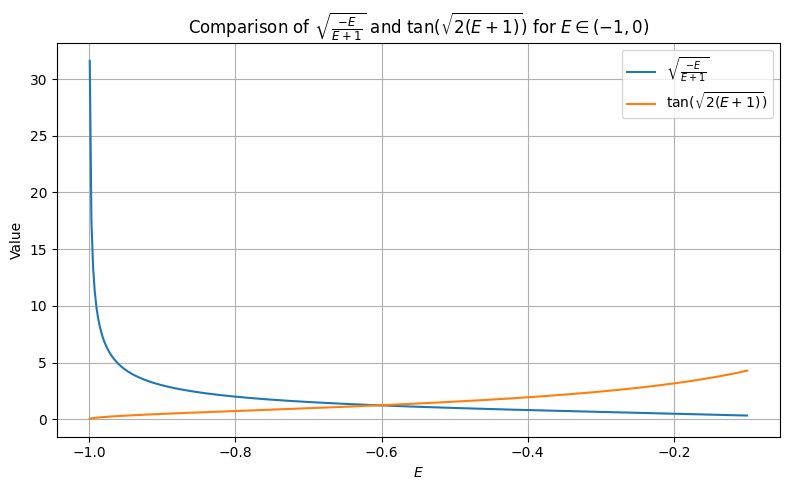

In [11]:
# Plot the functions for Problem 3
def f(x):
    return math.sqrt(-x/(x+1))
def g(x):
    return math.tan(math.sqrt(2*(x + 1)))

xs = np.linspace(-0.999, -0.1, 400)
fx = [f(x) for x in xs]
gx = [g(x) for x in xs]

plt.figure(figsize=(8, 5))
plt.plot(xs, fx, label=r'$\sqrt{\frac{-E}{E+1}}$')
plt.plot(xs, gx, label=r'$\tan(\sqrt{2(E+1)})$')
plt.xlabel(r'$E$')
plt.ylabel('Value')
plt.title(r'Comparison of $\sqrt{\frac{-E}{E+1}}$ and $\tan(\sqrt{2(E+1)})$ for $E \in (-1, 0)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

---

## Problem 4
Suppose Alex quit programming and decided to become an apple (fruit) shop owner. Alex buys 1000 apples every day and tries to sell them. The probability that $k$ customers want Alex's apples (one each) is given by the Poisson distribution:

$$
    P(k; \lambda) = \frac{\lambda^k \exp(-\lambda)}{k!}
$$

Where $\lambda$ is a parameter that represents the mean number of people who want Alex's apples each day.

After selling apples for 2000 days, Alex found that all 1000 apples were sold out on 600 days out of 2000 days.

The goal for this problem is to figure out how Alex should change the number of apples bought each day.

- In case you are curious: https://en.wikipedia.org/wiki/Poisson_distribution. The true distribution of this selling apple process should be binomial distribution, but with a large enough number of customers and a low enough probability of an individual buying an apple, this is an excellent approximation.

4.1) You may find that if you try to code the Poisson distribution directly, it will not work with large numbers.
$$
    P(k; \lambda) = \frac{\lambda^k \exp(-\lambda)}{k!}
$$

Explain briefly why Python complains when Alex tries to compute this for large $k$ and $\lambda$.

In [ ]:
import math

def bad_poisson(lmd, k):
	return pow(lmd, k) * math.exp(-lmd) / math.factorial(k)

# bad_poisson(1000, 1000)  # Uncomment to see it breaks

4.2) A very useful trick to avoid this problem is to take the logarithm of the Poisson formula and then exponentiate. That is,

$$
    P(k; \lambda) = \exp\left( \ln \left[ \frac{\lambda^k \exp(-\lambda)}{k!} \right] \right)
$$

First, show that
$$
    \ln(P(k; \lambda)) = (\ldots \ln(\ldots)-\ldots)-\ln(k!)
$$

Write out the steps to derive this result from the original formula.

4.3) The term $\ln(k!)$ appears frequently in mathematics and statistics. Most math libraries provide a fast way to compute this using the `lgamma` function, which gives $\ln((k-1)!)$.

For example:

`math.lgamma(5) == math.log(math.factorial(4))`

Your task: Implement $P(k; \lambda)$ using the log-exp trick described above, and use `math.lgamma` to handle the factorial term efficiently.

If you do it correctly, you should find $P(k=1000; \lambda=1000) \approx 0.0126146$.

4.4) Now for a practical challenge. Suppose $\lambda = 987.6$ (note: this is just an example value). Find the probability that Alex will sell all 1000 apples in a day. (Remember, if 1000 or more people want Alex's apples, all apples will be sold out.)

Hint: You do not need to sum the Poisson probabilities to infinity—find a practical way to compute this probability efficiently.

4.5) Recall the information:

After selling apples for 2000 days, Alex found that all 1000 apples were sold out on 600 days out of 2000 days.

Estimate the value of $\lambda$ (the average number of customers per day) to a reasonable accuracy ($<\pm 0.1$) that matches this observation.

4.6) Using the $\lambda$ you found in 4.5:

Alex buys apples for 20 Baht each and sells them for 50 Baht each. This means Alex makes a profit of 30 Baht for every apple sold. At the end of each day, any unsold apples are thrown away, resulting in a loss of 20 Baht per unsold apple.

If Alex buys 1000 apples a day, what would be his expected profit? (Remember to use the concept of expected value from discrete math/statistics.)

4.7) Using the $\lambda$ you found in 4.5, determine the optimal number of apples Alex should buy each day to maximize expected profit.

---

## Problem 5

Full Width at Half Maximum (FWHM) is an important measure of distribution width. It tells you how wide a distribution is at half of its maximum value. FWHM is commonly used in physics, statistics, and signal processing to characterize the spread of a peak or distribution.

For example, consider the distribution shown below, where the maximum occurs at $x = 0.0$ and $y = 1.0$.

The maximum value of this distribution is 1.0, so we are interested in the width of the distribution where its value is $1.0/2 = 0.5$.

The FWHM is illustrated by the black line in the plot. In this case, it's about 2.35 units wide.

Your tasks in this problem will involve calculating and analyzing the FWHM for different functions and parameters.

Text(0, 0.3, 'FWHM')

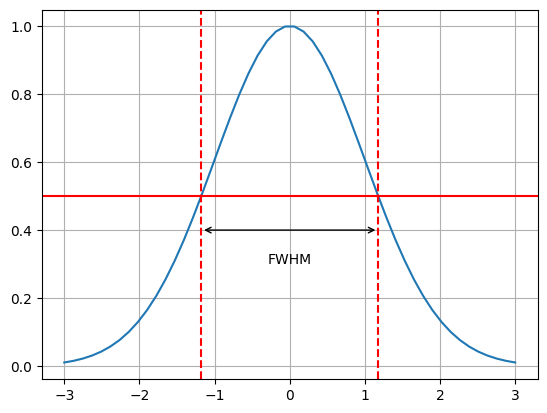

In [ ]:
import math

def demo(x):
	return math.exp(-x**2 / 2.0)

# Generate data
x = np.linspace(-3, 3)
y = [demo(xx) for xx in x]

# Plot the distribution
plt.plot(x, y)
plt.axhline(0.5, color='red')
plt.axvline(2.355 / 2, color='red', linestyle='dashed')
plt.axvline(-2.355 / 2, color='red', linestyle='dashed')
plt.grid()
plt.annotate('', xy=(-2.355 / 2, 0.4), xycoords='data', xytext=(2.355 / 2, 0.4), textcoords='data', arrowprops={'arrowstyle': '<->'})
plt.text(0, 0.3, 'FWHM', horizontalalignment='center')

5.1) Find the FWHM (full width at half maximum) of the following function:

$$
    f(x, \gamma) = \frac{\gamma}{(x - \mu)^2 + \gamma^2}
$$
where $\mu = 2.345$ and $\gamma = 3.1$.

Make sure your answer for the FWHM has an error less than $10^{-4}$.

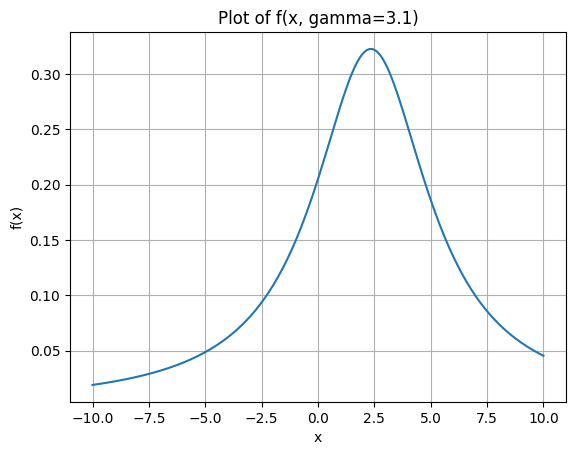

In [ ]:
import math

def f(x, gamma=3.1):
	mu = 2.345
	return gamma / ((x - mu) ** 2 + gamma ** 2)

# Generate data
x = np.linspace(-10, 10, 200)
y = [f(xx) for xx in x]

# Plot the function

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x, gamma=3.1)')
plt.grid(True)

5.2) Plot the FWHM (y-axis) as a function of $\gamma$ for the function $f(x, \gamma)$, where $\gamma$ ranges from $0.5$ to $3.0$. Make sure your plot includes at least 30 points for $\gamma$ values.

In [ ]:
print(f(1.0, gamma=0.2)) # you may find this useful

5.3) (Optional) Prove the mathematical relationship between FWHM and $\gamma$ for the function $f(x, \gamma)$. Show your derivation and explain why the FWHM depends on $\gamma$ in the way observed in your plot from 5.2.